# SKLEARN POWER TRANSFORMER MODULE 
## By Patrick L. Cavins

In this notebook, you will find an introduction to sklearn's power transformer module. This notebook uses the Ames, IA data set. This notebook is meant to accompany a Medium article, [Sklearn's Power Transformer Module](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=1&cad=rja&uact=8&ved=2ahUKEwjHos3Ip73lAhVTKH0KHYF4BM8QFjAAegQIABAG&url=https%3A%2F%2Fmedium.com%2F%40patricklcavins%2Fusing-scipys-powertransformer-3e2b792fd712&usg=AOvVaw1Iu9cCc3G1i1Y4IknM8nVr)

**CONTENTS INCLUDE:**
-  Importing Data with Pandas 
-  Checking for Normality:
    - Visually (Histograms) 
    - Descriptive Statistics (Skew and Kurtosis)
    - D'Angostino's $K^{2}$ Test
- 

In [56]:
# The Imports

import pandas as pd 
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

## Load the Data and Some Quick EDA

- Using the **Garage Area** feature from the Ames dataset.
- Units, $ft^{2}$
- a single NaN, replaced with 0
- Multiple 0's ~ working under the assumption that a zero indicates that a garage was not present 

In [15]:
#Load the Data
df = pd.read_csv('./train.csv')

#Checking for Nulls / EDA 
nulls = df['Garage Area'].isnull().sum()
print (f'The numbers of nulls: {nulls}')

#Replace the Null with 0 
df['Garage Area'] = df['Garage Area'].replace(np.nan, 0)
nulls = df['Garage Area'].isnull().sum()
print (f'The numbers of nulls: {nulls}')

#Drop Zeros from the pd.series (if zero we can assume that a garage is not around) 
garage_area = df['Garage Area']
garage_area = garage_area[garage_area != 0]

The numbers of nulls: 1
The numbers of nulls: 0


## Checking the Distribution using `Seaborn's Distplot`
Going to create a histogram using `distplot`. I, personally, prefer to keep the kernel density estimate turned off when I am inspecting data visually.  

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


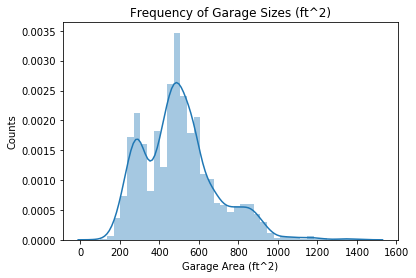

In [25]:
#Plot a Histogram of the data 
ax = sns.distplot(garage_area, kde=True)
ax.set(xlabel= 'Garage Area (ft^2)', ylabel='Counts', title='Frequency of Garage Sizes (ft^2)')
plt.show();

## Kurtosis and Skew in the Distribution 

Before we go and change the distruction using power transformer, it is important to take note of the skewness and the kurtosis in the data. These descriptive statistics would something you might report in any kind of formal report you might provide. 

In [18]:
#Calculating Skew and Kurtosis 
kurtosis = round((stats.kurtosis(garage_area)), ndigits=3)
skew = round((stats.skew(garage_area)), ndigits=3)

#Interpreting Skew 
if -0.5 < skew < 0.5:
    print (f'A skew of {skew} means the distribution is approx. symmetric')
elif  -0.5 < skew < -1.0 or 0.5 < skew < 1.0:
    print (f'A skew of {skew} means the distribution is moderately skewed')
else:
    print (f'A skew of {skew} means the distribution is highly skewed')

#Interpreting Kurtosis
if  -0.5 < kurtosis < 0.5:
    print (f'A kurtosis of {kurtosis} means the distribution is approximately normal sometimes called mesokurtic distributions')
elif kurtosis <= -0.5: 
    print (f'A kurtosis of {kurtosis} means the distribution is light-tailed (negative) sometimes called a platykurtic        distributions')
elif kurtosis >= 0.5:
    print (f'A kurtosis of {kurtosis} means the distribution is heavy-tailed (positive) sometimes called a leptokurtic distribution')

A skew of 0.802 means the distribution is moderately skewed
A kurtosis of 1.034 means the distribution is heavy-tailed (positive) sometimes called a leptokurtic distribution


## Angostino K^2 Test 



In [19]:
#calculate
stat, p = stats.normaltest(garage_area)
print (f'Statistic={stat}, p={p}')
print ('--'*25) 

# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistic=204.99777884661893, p=3.057017481546973e-45
--------------------------------------------------
Sample does not look Gaussian (reject H0)


## Mathematical Conversion of Garage Area variable 

- The `lambda` variable effects the strength of the transformation we are performing

- We eventually are going to want to optimize the lambda for this specific feature

In [35]:
# Calculating Values in the Box-Cox Transformation
# xt = (x**lambda - 1) / lambda

# define the set of lambda's that we want to search over
lmbda = [0.1, 1.0]

garage_area_xt = []

for i in lmbda: 
    #x = the input data 
    x = garage_area 
    #box-cox transformation 
    transform = (x**i - 1) / i
    #appending the list 
    garage_area_xt.append(transform)

In [44]:
lmbda[0]

0.1

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


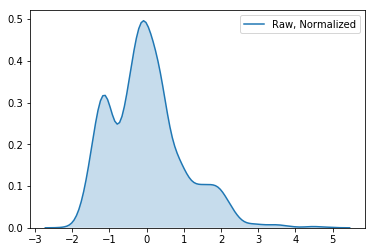

In [58]:
#Plotting the Changes 
sns.kdeplot(garage_area, shade=True, label="Raw")
sns.kdeplot(garage_area_xt[0], shade=True, 
            label= f"Lambda Value: {lmbda[0]}")
sns.kdeplot(garage_area_xt[1], shade=True, 
            label= f'Lambda Value: {lmbda[1]}')


#plot with z-score normalization 
garage_area_zscore = stats.zscore(garage_area)
# garage_area_lbmd1  = stats.

sns.kdeplot(garage_area_zscore, shade=True, label="Raw, Normalized");

## Converting Data 

### Finding the optimal Lambda value using `stats.boxcox_normplot()`






















The optimal lambda is 0.24792604287869996


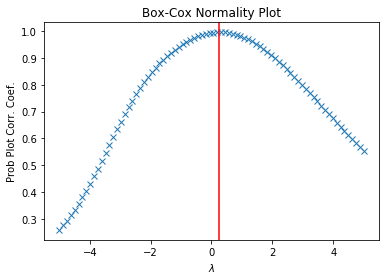

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)
prob = stats.boxcox_normplot(garage_area, -5, 5, plot=ax)
garage_area_xt, maxlog = stats.boxcox(garage_area)
ax.axvline(maxlog, color='r')

print (f'The optimal lambda is {maxlog}')


## Comparing Histograms

((array([-3.38354553, -3.13188225, -2.99225756, ...,  2.99225756,
          3.13188225,  3.38354553]),
  array([ 8.60022098, 10.16157831, 10.16157831, ..., 20.04393322,
         20.07928121, 20.34804173])),
 (1.744688020129585, 14.561598717933183, 0.9951528024307996))

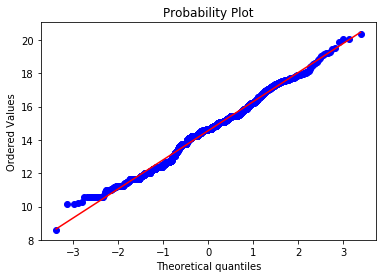

In [23]:
#importing the qqplot tool from statsmodels 
from statsmodels.graphics.gofplots import qqplot

#making the graph 
stats.probplot(garage_area_xt, plot=plt)

## Distrubtion of the Garage Area variable after the Box-Cox transformation 

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


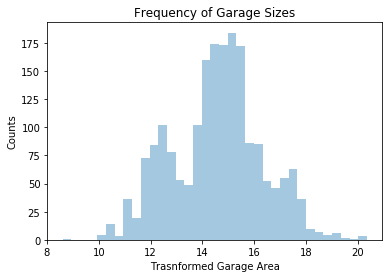

In [24]:
ax = sns.distplot(garage_area_xt, kde=False)
ax.set(xlabel= 'Trasnformed Garage Area', ylabel='Counts', title='Frequency of Garage Sizes')
plt.show()